In [131]:
import os
import shutil

import glob
import shutil
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import uuid

## Clean the Data

Data from [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/)

2371 cat images and 4978 dog images

### Oxford-IIIT Pet Dataset

Read all data into dataframe

In [132]:
# Check the path before running cells
DATA_DIR = "data/Oxford_IIIT_Pet_Dataset"

# Read the `list.txt` to find the labels of images
with open(os.path.join(DATA_DIR, "annotations", "list.txt")) as f:
    text = f.readlines()

# Clean the lines then convert to pandas dataframe
text = [line.strip().split(' ') for line in text[6:]]
data = pd.DataFrame(text, columns=["image_name", "id", "species", "breed"])

# The species label of cat is 1
print("Number of images \nCat: %s \nDog: %s" % (len(data[data.species == '1']), len(data[data.species != '1'])))

Number of images 
Cat: 2371 
Dog: 4978


In [133]:
data = data[data.species == '1']

See data 
- 1: foreground 
- 2: background
- 3: not classified

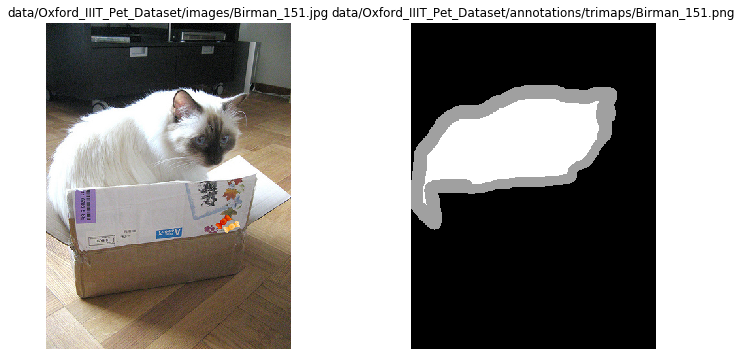

In [134]:
random_image_name = np.random.choice(data[data.species == '1'].image_name)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(os.path.join(DATA_DIR, "images", random_image_name + ".jpg"))
img = cv2.imread(os.path.join(DATA_DIR, "images", random_image_name + ".jpg"))
plt.imshow(img[:,:,::-1])
plt.axis('off')

plt.subplot(122)
plt.title(os.path.join(DATA_DIR, "annotations", "trimaps", random_image_name + ".png"))
img = cv2.imread(os.path.join(DATA_DIR, "annotations", "trimaps", random_image_name + ".png"))
img[img==1] = 255
img[img==2] = 0
img[img==3] = 160
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

Shuffle the data

In [135]:
data = shuffle(data)

Split train and val set

In [136]:
val_split = 0.2
split_index = int(len(data)*(1-val_split))

train_dir = os.path.join("data", "train_image", "class_0")
train_mask_dir = os.path.join("data", "train_mask", "class_0")

val_dir = os.path.join("data", "val_image", "class_0")
val_mask_dir = os.path.join("data", "val_mask", "class_0")

In [137]:
for dest_dir in [train_dir, train_mask_dir, val_dir, val_mask_dir]:
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

Copy image and mask for train data

In [139]:
for image_name in tqdm(data[:split_index].image_name):
    src = os.path.join(DATA_DIR, "images", image_name + ".jpg")
    dest = os.path.join(train_dir, image_name + ".jpg")
    shutil.copyfile(src, dest)

In [140]:
for image_name in tqdm(data[:split_index].image_name):
    src = os.path.join(DATA_DIR, "annotations", "trimaps", image_name + ".png")
    dest = os.path.join(train_mask_dir, image_name + ".png")
    img = cv2.imread(src)
    img = img - 1
#     img[img==1] = 1
#     img[img==3] = 1
#     img[img==2] = 0
    cv2.imwrite(dest, img)

Copy image and mask for val data

In [141]:
for image_name in tqdm(data[split_index:].image_name):
    src = os.path.join(DATA_DIR, "images", image_name + ".jpg")
    dest = os.path.join(val_dir, image_name + ".jpg")
    shutil.copyfile(src, dest)

In [142]:
for image_name in tqdm(data[split_index:].image_name):
    src = os.path.join(DATA_DIR, "annotations", "trimaps", image_name + ".png")
    dest = os.path.join(val_mask_dir, image_name + ".png")
    img = cv2.imread(src)
    img = img - 1
#     img[img==1] = 1
#     img[img==3] = 1
#     img[img==2] = 0
    cv2.imwrite(dest, img)

## Check Data

### Oxford-IIIT Pet Dataset

In [143]:
def see_image_and_mask(image_dir, mask_dir):
    random_image_name = np.random.choice(data[data.species == '1'].image_name)
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.title(os.path.join(image_dir, random_image_name + ".jpg"))
    img = cv2.imread(os.path.join(image_dir, random_image_name + ".jpg"))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

    plt.subplot(122)
    plt.title(os.path.join(mask_dir, random_image_name + ".png"))
    img = cv2.imread(os.path.join(mask_dir, random_image_name + ".png"))
    img[img==0] = 255
    img[img==1] = 0
    img[img==2] = 180
    plt.imshow(img)
    plt.axis('off')
    plt.show()

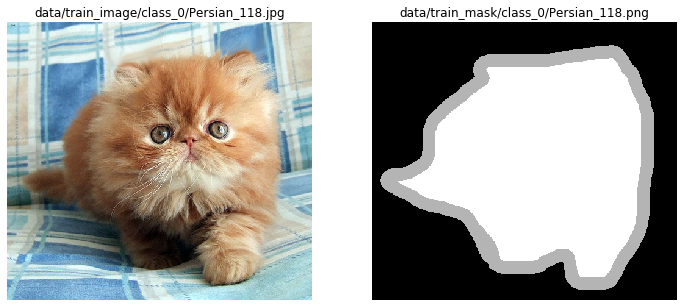

In [148]:
see_image_and_mask(train_dir, train_mask_dir)

TypeError: 'NoneType' object is not subscriptable

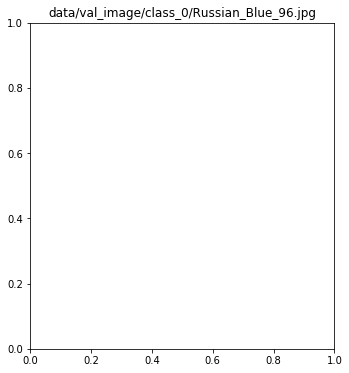

In [149]:
see_image_and_mask(val_dir, val_mask_dir)